# Tier 2. Module 2: Machine Learning. Fundamentals and Applications
## Topics 11-12 - Unsupervised learning algorithms
## Homework

Exploring basic unsupervised learning tasks such as clustering and data dimensionality reduction using the two most common methods: KMeans and PCA respectively. Discovering hidden relationships between data objects by grouping them into clusters can greatly expand our understanding of a data set.

### 1. Download the Concrete dataset

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import plotly.express as px
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

with open('datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

concrete = datasets['concrete']
print(concrete.shape)
concrete.head()

(427, 8)


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,25.46
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,29.23
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,31.02
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,33.19
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.31


### 2. Create a new Components feature

In [5]:
components = ['Cement',
              'BlastFurnaceSlag',
              'FlyAsh',
              'Water',
              'Superplasticizer',
              'CoarseAggregate',
              'FineAggregate']

concrete['Components'] = concrete[components].gt(0).sum(axis=1)

concrete[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,5
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,5
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,5
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,5
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,7
5,132.0,207.0,161.0,179.0,5.0,867.0,736.0,7
6,133.0,200.0,0.0,192.0,0.0,927.4,839.2,5
7,133.0,210.0,0.0,196.0,3.0,949.0,795.0,6
8,133.1,210.2,0.0,195.7,3.1,949.4,795.3,6
9,134.7,0.0,165.7,180.2,10.0,961.0,804.9,6


### 3. Data set normalization

In [6]:
scaler = StandardScaler().set_output(transform='pandas')

X = scaler.fit_transform(concrete)

### 4. Determination of the optimal number of clusters

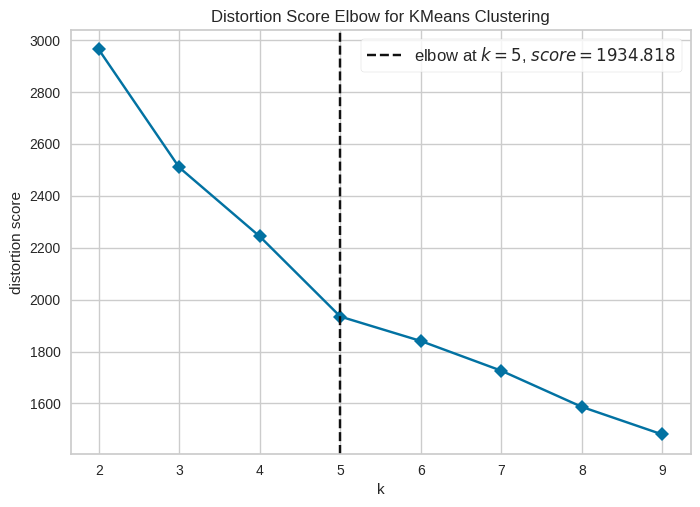

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model_kmn = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model_kmn,
    k=(2, 10),
    timings=False)


with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    visualizer.fit(X)

visualizer.show()

Optimal number of clusters is 5.

### 5. Clustering

In [8]:
k_best = visualizer.elbow_value_

model_kmeans = KMeans(n_clusters=k_best, random_state=42).fit(X)

labels_kmeans = pd.Series(model_kmeans.labels_, name='Clusters')

### 6. Descriptive statistics of clusters

In [9]:
concrete_cluster = concrete.copy()
concrete_cluster["Clusters"] = labels_kmeans

report = concrete_cluster.groupby("Clusters").mean()
report

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components
Clusters,,,,,,,,,
0,211.585714,9.289286,134.369048,171.339286,9.713095,994.159524,801.476190,36.279286,6.154762
1,206.472222,189.117778,0.544444,189.334444,4.096667,970.222222,756.334444,36.939333,5.555556
2,220.262500,109.173214,120.245536,194.457143,8.991964,885.809821,734.952679,33.199286,6.803571
3,398.271667,92.496667,27.625000,162.635000,10.766667,924.690000,778.655000,62.466167,6.000000
4,345.786420,3.783951,0.740741,191.662963,0.519753,1026.165432,765.483951,34.794074,4.172840


### 7. The number of recipes per cluster

In [10]:
recipes = concrete_cluster["Clusters"].value_counts().sort_index()

report["Recipes"] = recipes
report

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components,Recipes
Clusters,,,,,,,,,,
0,211.585714,9.289286,134.369048,171.339286,9.713095,994.159524,801.476190,36.279286,6.154762,84
1,206.472222,189.117778,0.544444,189.334444,4.096667,970.222222,756.334444,36.939333,5.555556,90
2,220.262500,109.173214,120.245536,194.457143,8.991964,885.809821,734.952679,33.199286,6.803571,112
3,398.271667,92.496667,27.625000,162.635000,10.766667,924.690000,778.655000,62.466167,6.000000,60
4,345.786420,3.783951,0.740741,191.662963,0.519753,1026.165432,765.483951,34.794074,4.172840,81


### 8. Conclusions

#### 8.1. Most important influential features for clustering

In [11]:
centroids = model_kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=X.columns)
variances = centroids_df.var()
variances

,0
Cement,0.746237
BlastFurnaceSlag,0.769714
FlyAsh,0.980116
Water,0.533258
Superplasticizer,0.650104
CoarseAggregate,0.440173
FineAggregate,0.115178
CompressiveStrength,0.618239
Components,0.923914


From the analysis of the dispersion of the centroids of each cluster, it can be concluded that clustering is most affected by number of components, amount of fly ash and blast furnace slag.

#### 8.2. Clusters visualization

In [12]:
fig = px.scatter_3d(concrete_cluster,
                    x='Components',
                    y='FlyAsh',
                    z='BlastFurnaceSlag',
                    color='Clusters',
                    title='Concrete Cluster Plot')

fig.show()

#### 8.3. Clusters description

The following conclusions can be drawn from the analysis of the performed clustering:
* Cluster 0 is a six-component mixture in which Slag is missing;
* Cluster 1 - a five- or six-component mixture, in which Ash is missing and a low amount of Plasticizer;
* Cluster 2 - the most popular seven-component mixture, in which all the components are present, which are the cheapest;
* Cluster 3 is a high-strength and expensive six-component mixture in which there is only a small amount of Ash, but a high content of Plasticizer;
* Cluster 4 is a four-component mixture that lacks Slag and Ash and a small amount of Plasticizer.